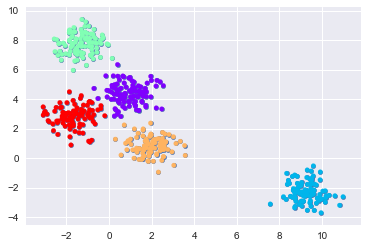

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=500,centers=5,random_state=0,cluster_std=0.660)
plt.scatter(X[:,0],X[:,1],s=20)
from sklearn.cluster import KMeans
est=KMeans(5)
est.fit(X)
y_kmeans=est.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=20,cmap="rainbow")



In [49]:
import numpy as np
import matplotlib.pyplot as plt
x,y=[],[]
for sample in open("arti.txt","r"):
    x_,y_=sample.split(",")
    x.append(float(x_))
    y.append(float(y_))
x=(x-x.mean())/x.std()
plt.figure()
plt.scatter(x,y,c="g",s=50)
plt.show()
x0=np.linspace(-2,4,100)
def get_model(deg):
    return lambda input_x=x0:np.polyval(np.polyfit(x,y,deg),input_x)
def get_cost(deg,input_x,input_y):
    return 0.5*((get_model(deg)(input_x)-input_y)**2).sum()
test_set=(1,4,10)
for d in test_set:
    print(get_cost(d,x,y))
plt.scatter(x,y,c="g",s=30)
for d in test_set:
    plt.plot(x0,get_model(d)(),label="degree={}".format(d))
plt.xlim(-2,4)
plt.ylim(1e5,8e5)
plt.legend()
plt.show()



AttributeError: 'list' object has no attribute 'mean'

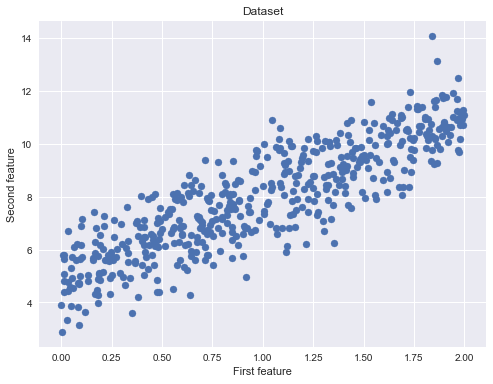

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)
Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.208434614609594
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467


NameError: name 'n_iters' is not defined

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')
class LinearRegression:
    
    def __init__(self):
        pass
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias
           
            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)
           
            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")
            
            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db
        
        return self.weights, self.bias, costs
   
    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
attr_arr=[['slashdot','USA','yes',18,'None'],
         ['google','France','yes',23,'Premium'],
         ['digg','USA','yes',24,'Basic'],
         ['kiwitobes','France','yes',23,'Basic'],
         ['google','UK','no',21,'Premium'],
         ['(direct)','New Zealand','no',12,'None'],
         ['(direct)','UK','no',21,'Basic'],
         ['google','USA','no',24,'Premium'],
         ['slashdot','France','yes',19,'None'],
         ['digg','USA','no',18,'None'],
         ['google','UK','no',18,'None'],
         ['kiwitobes','UK','no',19,'None'],
         ['digg','New Zealand','yes',12,'Basic'],
         ['slashdot','UK','no',21,'None'],
         ['google','UK','yes',18,'Basic'],
         ['kiwitobes','France','yes',19,'Basic']]

dataMat=np.mat(attr_arr)
arrMat=dataMat[:,0:4]
resultMat=dataMat[:,4]
print(arrMat)

attr_names=["stc","address","FAQ","num"]
attr_pd=pd.DataFrame(data=arrMat,columns=attr_names)
print(attr_pd)

le=LabelEncoder()
for col in attr_pd.columns:
    attr_pd[col]=le.fit_transform(attr_pd[col])
print(attr_pd)

clf=tree.DecisionTreeClassifier()
clf.fit(attr_pd,resultMat)
print(clf)
result=clf.predict([[1,1,1,0]])
print(result)

from sklearn.tree import export_graphviz
name = 'tree.jpg'
with open(name, 'w') as f:
    f = export_graphviz(clf, feature_names=attr_names, out_file=f)



[['slashdot' 'USA' 'yes' '18']
 ['google' 'France' 'yes' '23']
 ['digg' 'USA' 'yes' '24']
 ['kiwitobes' 'France' 'yes' '23']
 ['google' 'UK' 'no' '21']
 ['(direct)' 'New Zealand' 'no' '12']
 ['(direct)' 'UK' 'no' '21']
 ['google' 'USA' 'no' '24']
 ['slashdot' 'France' 'yes' '19']
 ['digg' 'USA' 'no' '18']
 ['google' 'UK' 'no' '18']
 ['kiwitobes' 'UK' 'no' '19']
 ['digg' 'New Zealand' 'yes' '12']
 ['slashdot' 'UK' 'no' '21']
 ['google' 'UK' 'yes' '18']
 ['kiwitobes' 'France' 'yes' '19']]
          stc      address  FAQ num
0    slashdot          USA  yes  18
1      google       France  yes  23
2        digg          USA  yes  24
3   kiwitobes       France  yes  23
4      google           UK   no  21
5    (direct)  New Zealand   no  12
6    (direct)           UK   no  21
7      google          USA   no  24
8    slashdot       France  yes  19
9        digg          USA   no  18
10     google           UK   no  18
11  kiwitobes           UK   no  19
12       digg  New Zealand  yes  12
13  

(150, 4)


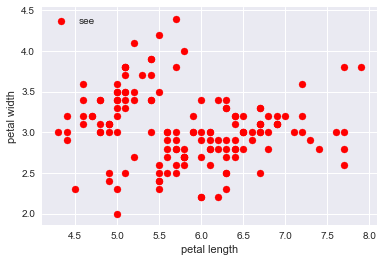

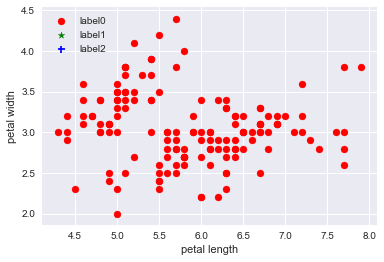

In [75]:

import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  
 
estimator = KMeans(n_clusters=1)
estimator.fit(X)  
label_pred = estimator.labels_  
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show() 
